In [1]:
import sys
!{sys.executable} -m pip install pandas

In [2]:
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Cleaning the Data

In [4]:
db = pd.read_csv('/Users/puria22/AISC Project/diabetes(1).csv')
db.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
# take out columns with a lot of rows with 0s
db = db.loc[~db.duplicated(subset = ['SkinThickness', 'Insulin', 'BloodPressure', 'Glucose'])] \
    .reset_index(drop=True)
db.shape

(757, 9)

In [6]:
# replace these columns with the means of the columns
columns_to_replace_w_means = ['BloodPressure', 'Insulin', 'SkinThickness']
for column in columns_to_replace_w_means:
    mean_value = db[column][db[column] != 0].mean()
    
    db[column] = db[column].replace(0, mean_value)
db.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.000000,35.00000,155.548223,33.6,0.627,50,1
1,1,85,66.000000,29.00000,155.548223,26.6,0.351,31,0
2,8,183,64.000000,29.15342,155.548223,23.3,0.672,32,1
3,1,89,66.000000,23.00000,94.000000,28.1,0.167,21,0
4,0,137,40.000000,35.00000,168.000000,43.1,2.288,33,1
5,5,116,74.000000,29.15342,155.548223,25.6,0.201,30,0
6,3,78,50.000000,32.00000,88.000000,31.0,0.248,26,1
7,10,115,72.342503,29.15342,155.548223,35.3,0.134,29,0
8,2,197,70.000000,45.00000,543.000000,30.5,0.158,53,1
9,8,125,96.000000,29.15342,155.548223,0.0,0.232,54,1


Outcome
0    495
1    262
Name: count, dtype: int64


Text(0.5, 1.0, 'Bar Plot of Outcome Variable Counts')

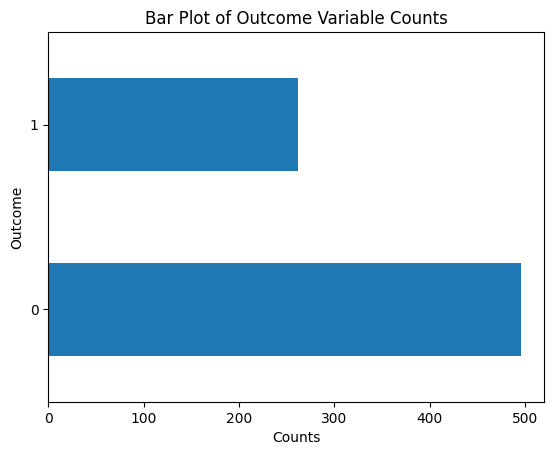

In [7]:
# show outcomes
counts = db['Outcome'].value_counts()
print(counts)
counts.sort_index().plot(kind='barh', xlabel="Counts")
plt.title("Bar Plot of Outcome Variable Counts")

## EDS

/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


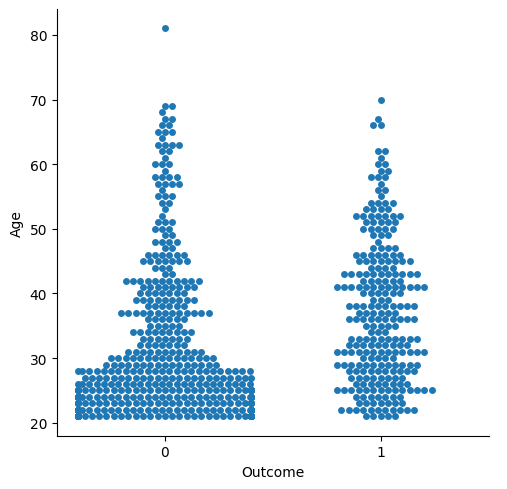

In [8]:
sns.catplot(x="Outcome", y="Age", kind="swarm", data=db)

Text(0.5, 0, 'Glucose Levels')

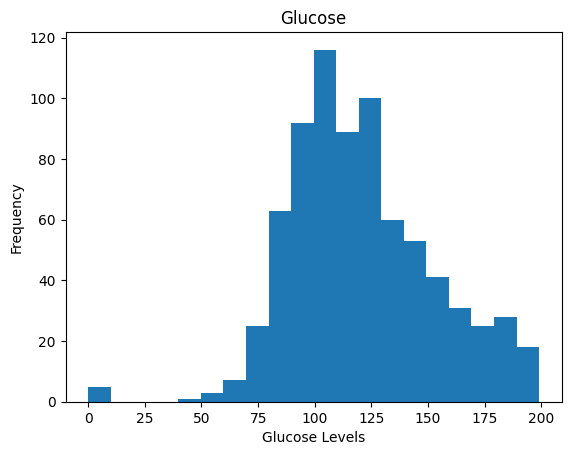

In [9]:
# to see spread of glucose
ax = db['Glucose'].plot(kind='hist', bins=20,
                   title = 'Glucose')
ax.set_xlabel('Glucose Levels')

In [10]:
#db.plot(kind= 'scatter',
        #x= 'Insulin',
        #y = 'BloodPressure',
        #title = '')
#plt.show

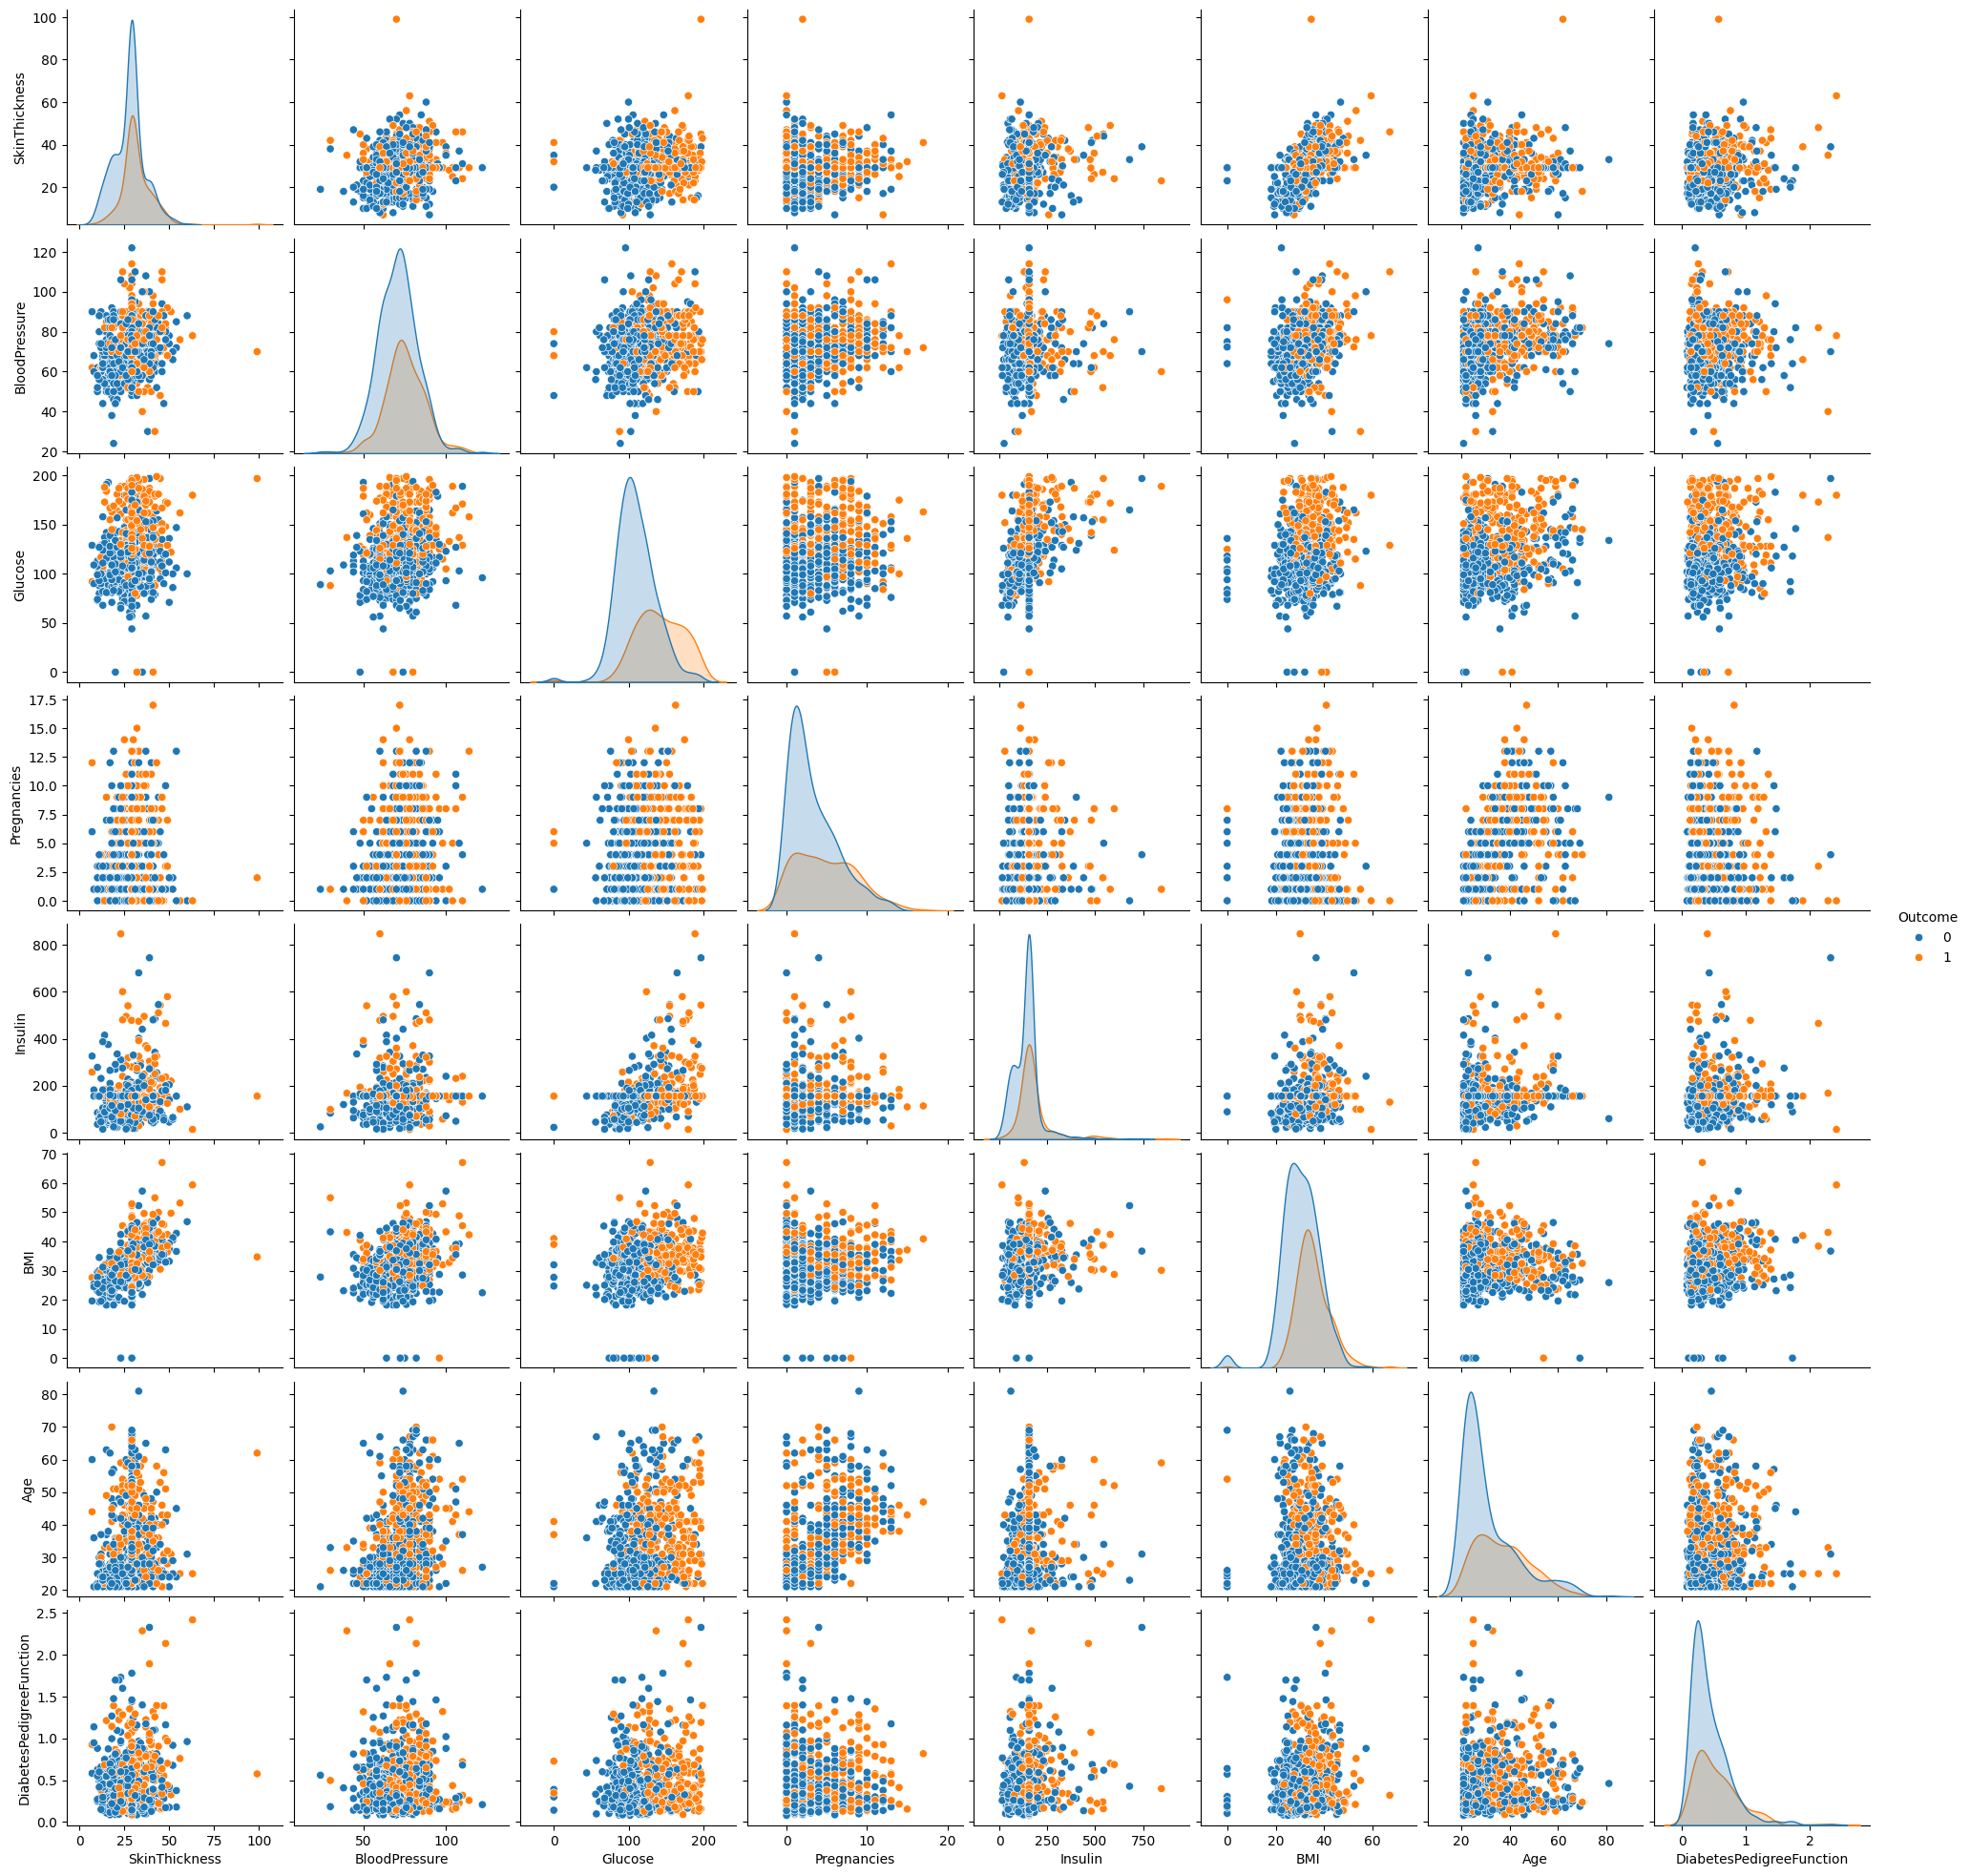

In [19]:
# pairplot to see relation of different factors against each other; the colors of dots are the outcomes
sns.pairplot(db,
            vars=['SkinThickness', 'BloodPressure', 'Glucose', 'Pregnancies', 'Insulin', 'BMI', 'Age', 'DiabetesPedigreeFunction'], 
            hue='Outcome')

In [13]:
db_corr = db[['SkinThickness', 'BloodPressure', 'Glucose', 'Pregnancies', 'Insulin', 'BMI', 'Age', 'DiabetesPedigreeFunction']].dropna().corr()
db_corr

,SkinThickness,BloodPressure,Glucose,Pregnancies,Insulin,BMI,Age,DiabetesPedigreeFunction
SkinThickness,1.000000,0.194003,0.182631,0.083934,0.158139,0.488641,0.129187,0.101510
BloodPressure,0.194003,1.000000,0.219120,0.212117,0.072962,0.243716,0.331981,-0.005064
Glucose,0.182631,0.219120,1.000000,0.131564,0.408092,0.222406,0.266389,0.138569
Pregnancies,0.083934,0.212117,0.131564,1.000000,0.056665,0.030516,0.553792,-0.040550
Insulin,0.158139,0.072962,0.408092,0.056665,1.000000,0.152001,0.138139,0.099165
BMI,0.488641,0.243716,0.222406,0.030516,0.152001,1.000000,0.039485,0.145844
Age,0.129187,0.331981,0.266389,0.553792,0.138139,0.039485,1.000000,0.027129
DiabetesPedigreeFunction,0.101510,-0.005064,0.138569,-0.040550,0.099165,0.145844,0.027129,1.000000


<Axes: >

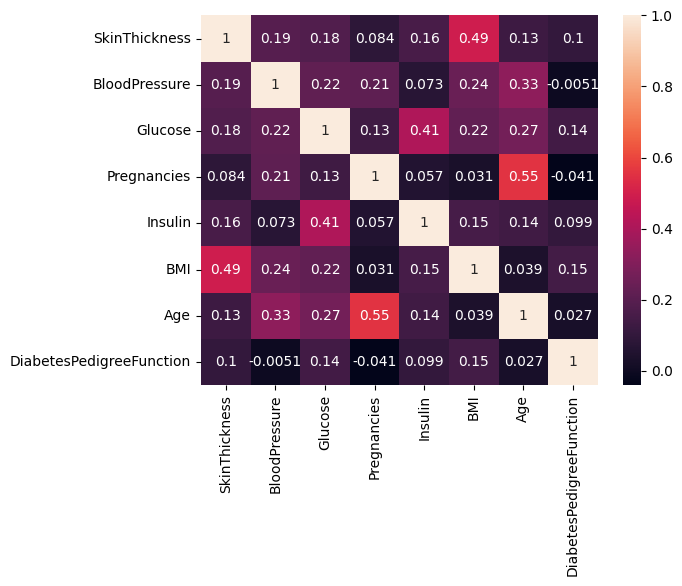

In [15]:
sns.heatmap(db_corr, annot=True)

## Observations

### From the pairplots and correlation heatmap, we can see the relations of all the factors with each other and the outcomes of each. From this, I can make the following conclusion about indicators for diabetes:
#### - High glucose values usually correlate to a outcome of diabetes. It affects all the factors and the outcome of diabetes is usually on the higher side.
#### - The relation of DiabetesPedigreeFunction and BMI has an effect on the outcome and there is a sliver of 1s in the graph of DiabetesPedigreeFunction and BMI that could be a good range for indicators.
#### - Excluding the outliers, for insulin. Looking at the above mean numbers could be great indicators as well.
#### - There is a positive correlation of pregnancies and age
#### - There is a slight positive correlation between BMI and skin thickness